# 240970107
VIKITH B KOTIAN

In [99]:
import pandas as pd
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


1. Preprocessing:  
a. Find any null values are present or not, If present remove those data.  

In [100]:
print("Null values in each column:\n", df.isnull().sum())
df_clean = df.dropna()
print(f"Data shape after removing nulls: {df_clean.shape}")

Null values in each column:
 Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64
Data shape after removing nulls: (19662, 11)


b. Remove the data that have less than 5 reviews.  

In [101]:
review_counts = df_clean.groupby('Clothing ID').size()
valid_ids = review_counts[review_counts >= 5].index
df_filtered = df_clean[df_clean['Clothing ID'].isin(valid_ids)]
print(f"Data shape after removing less than 5 reviews: {df_filtered.shape}")

Data shape after removing less than 5 reviews: (18401, 11)


c. Clean the data and remove the special characters and replace the contractions with its 
expansion. Convert the uppercase character to lower case. Also, remove the 
punctuations.  

In [102]:
import re
import string

# Your contractions dictionary
contractions_dict = {
    "can't": "cannot",
    "won't": "will not",
    "don't": "do not",
    "didn't": "did not",
    "isn't": "is not",
    "it's": "it is",
    "i'm": "i am",
    "you're": "you are",
    "they're": "they are",
    "we're": "we are",
    "that's": "that is",
    # Add more if needed
}

def expand_contractions(text, contractions_dict=contractions_dict):
    pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), flags=re.IGNORECASE|re.DOTALL)
    
    def replace(match):
        matched_text = match.group(0)
        expanded_text = contractions_dict.get(matched_text.lower(), matched_text)
        return expanded_text
    
    return pattern.sub(replace, text)

def clean_text(text):
    text = expand_contractions(text)
    text = text.lower()  # convert to lower case
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.strip()
    return text

# Make explicit copy before modifying
df_filtered = df_filtered.copy()

# Apply cleaning function to Review Text
df_filtered['Cleaned_Review'] = df_filtered['Review Text'].apply(clean_text)

print(df_filtered[['Review Text', 'Cleaned_Review']].head())


                                         Review Text  \
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
5  I love tracy reese dresses, but this one is no...   
6  I aded this in my basket at hte last mintue to...   
7  I ordered this in carbon for store pick up, an...   

                                      Cleaned_Review  
2  i had such high hopes for this dress and reall...  
3  i love love love this jumpsuit it is fun flirt...  
5  i love tracy reese dresses but this one is not...  
6  i aded this in my basket at hte last mintue to...  
7  i ordered this in carbon for store pick up and...  


2. Separate the columns into dependent and independent variables (or features and 
labels). Then you split those variables into train and test sets (80:20).  

In [103]:
from sklearn.model_selection import train_test_split

X = df_filtered['Cleaned_Review']
y = df_filtered['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 14720, Test size: 3681


3. Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended  

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

4. Tabulate accuracy in terms of precision, recall and F1 score.  

In [105]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred, target_names=['Not Recommended', 'Recommended'])
print(report)


                 precision    recall  f1-score   support

Not Recommended       1.00      0.02      0.04       671
    Recommended       0.82      1.00      0.90      3010

       accuracy                           0.82      3681
      macro avg       0.91      0.51      0.47      3681
   weighted avg       0.85      0.82      0.74      3681



### EXERCISE 2

1. Data Preprocessing and Feature Engineering 

    • Load the dataset and explore its structure. 
    
    • Identify and handle missing values appropriately. 
    
    • Perform feature selection by calculating correlation coefficients an removing highly correlated features. 
    
    • Convert continuous variables into categorical bins where appropriate (e.g., discretizing age-based rates). 
    
    • Apply dimensionality reduction techniques such as PCA to optimize feature space. 
    
    • Create a binary target variable based on whether the 'Total.Rate' is above or below the third quartile, making classification more challenging. 

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_fscore_support

# Load dataset
df = pd.read_csv('cancer.csv')

# 1. Explore structure
print(df.info())
print(df.describe())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Total.Rate                                    51 non-null     float64
 2   Total.Number                                  51 non-null     float64
 3   Total.Population                              51 non-null     float64
 4   Rates.Age.< 18                                51 non-null     float64
 5   Rates.Age.18-45                               51 non-null     float64
 6   Rates.Age.45-64                               51 non-null     float64
 7   Rates.Age.> 64                                51 non-null     float64
 8   Rates.Age and Sex.Female.< 18                 51 non-null     float64
 9   Rates.Age and Sex.Male.< 18                   51 non-null     float

In [107]:
# 2. Handle missing values - drop or impute
print(df.isnull().sum())
# Let's drop rows with missing values for simplicity here:
df = df.dropna()



State                                 0
Total.Rate                            0
Total.Number                          0
Total.Population                      0
Rates.Age.< 18                        0
                                     ..
Types.Lung.Race.Black                 0
Types.Lung.Race.Black non-Hispanic    0
Types.Lung.Race.Asian                 0
Types.Lung.Race.Indigenous            0
Types.Lung.Race.Hispanic              0
Length: 75, dtype: int64


In [108]:
#3.• Perform feature selection by calculating correlation coefficients and removing highly correlated features. 
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix on numeric data only
corr_matrix = numeric_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9 (threshold can be adjusted)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:")
for feature in to_drop:
    print(f" - {feature}")
    


Highly correlated features to drop:
 - Total.Population
 - Rates.Age and Sex.Female.18 - 45
 - Rates.Age and Sex.Male.18 - 45
 - Rates.Age and Sex.Female.45 - 64
 - Rates.Age and Sex.Male.45 - 64
 - Rates.Age and Sex.Female.> 64
 - Rates.Age and Sex.Male.> 64
 - Rates.Race.White non-Hispanic
 - Rates.Race and Sex.Female.White
 - Rates.Race and Sex.Female.White non-Hispanic
 - Rates.Race and Sex.Female.Black non-Hispanic
 - Rates.Race and Sex.Female.Indigenous
 - Rates.Race and Sex.Male.White
 - Rates.Race and Sex.Male.White non-Hispanic
 - Rates.Race and Sex.Male.Black
 - Rates.Race and Sex.Male.Black non-Hispanic
 - Rates.Race and Sex.Male.Indigenous
 - Types.Breast.Race.White non-Hispanic 
 - Types.Breast.Race.Black non-Hispanic
 - Types.Colorectal.Total
 - Types.Colorectal.Race.White non-Hispanic
 - Types.Colorectal.Race.Black
 - Types.Colorectal.Race.Black non-Hispanic
 - Types.Lung.Total
 - Types.Lung.Age and Sex.Female.45 - 64
 - Types.Lung.Age and Sex.Male.45 - 64
 - Types.Lung.

In [109]:
# 4. Convert continuous variables into categorical bins (example with 'Total.Rate')
from sklearn.preprocessing import KBinsDiscretizer

# Initialize discretizer (4 bins, ordinal encoding, quantile strategy)
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

# Apply discretization to 'Total.Rate'
df_reduced['Total.Rate.Bin'] = discretizer.fit_transform(
    df_reduced[['Total.Rate']]
).astype(int).flatten()

# Show results
print(df_reduced[['Total.Rate', 'Total.Rate.Bin']].head())


   Total.Rate  Total.Rate.Bin
0       214.2               3
1       128.1               0
2       165.6               0
3       223.9               3
4       150.9               0


In [110]:
# 5. Dimensionality reduction (PCA) - scale features first (excluding target and categorical cols)

# Drop only if they exist
drop_cols = ['State', 'Total.Rate.Bin', 'Total.Rate', 'Target']
drop_cols = [col for col in drop_cols if col in df_reduced.columns]

features = df_reduced.drop(columns=drop_cols)

# Keep only numeric features
features = features.select_dtypes(include=[np.number])

# Standardize
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA (keep 95% variance)
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_scaled)

print(f"PCA reduced features from {features.shape[1]} to {features_pca.shape[1]}")


PCA reduced features from 41 to 15


In [111]:
# 6. Create binary target variable based on whether 'Total.Rate' > 3rd quartile
q3 = df_reduced['Total.Rate'].quantile(0.75)
df_reduced['Target'] = (df_reduced['Total.Rate'] > q3).astype(int)

print(df_reduced['Target'].value_counts())

Target
0    38
1    13
Name: count, dtype: int64


2. Split the dataset into training and testing sets with an 80-20 ratio.

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features and target
features = [
    'Rates.Age.< 18',
    'Rates.Age.18-45',
    'Rates.Age.45-64',
    'Rates.Age.> 64',
    'Rates.Race.White',
    'Rates.Race.Black',
    'Types.Lung.Race.Hispanic'
]

target = 'Target'

X = df_reduced[features]
y = df_reduced[target]

# Encode target if needed
if y.dtype == 'O' or not pd.api.types.is_numeric_dtype(y):
    le = LabelEncoder()
    y = le.fit_transform(y)
    print(f"Encoded target classes: {le.classes_}")

# Split dataset (80% train, 20% test), stratified to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print("Target class distribution in training set:")
print(pd.Series(y_train).value_counts())


Training samples: 40
Testing samples: 11
Target class distribution in training set:
Target
0    30
1    10
Name: count, dtype: int64


3.  Implementing Naïve Bayes  

    • Select the following features for classification: 
    
            o Rates.Age.< 18 
            o Rates.Age.18-45 
            o Rates.Age.45-64 
            o Rates.Age.> 64 
            o Types.Lung.Race.White 
            o Types.Lung.Race.Black 
            o Types.Lung.Race.Hispanic 
            
    • Train multiple Naïve Bayes models (GaussianNB, MultinomialNB, and BernoulliNB) using only the selected features. 
    
    • Compare the models based on precision, recall, F1-score, and AUC-ROC curve. 
    
    • Analyze the assumptions of each Naïve Bayes variant and determine which one  fits the dataset best. 

GaussianNB performance:
 Precision: 0.600
 Recall: 1.000
 F1-score: 0.750
 AUC-ROC: 0.750

MultinomialNB performance:
 Precision: 0.167
 Recall: 0.333
 F1-score: 0.222
 AUC-ROC: 0.500

BernoulliNB performance:
 Precision: 0.000
 Recall: 0.000
 F1-score: 0.000
 AUC-ROC: 0.542



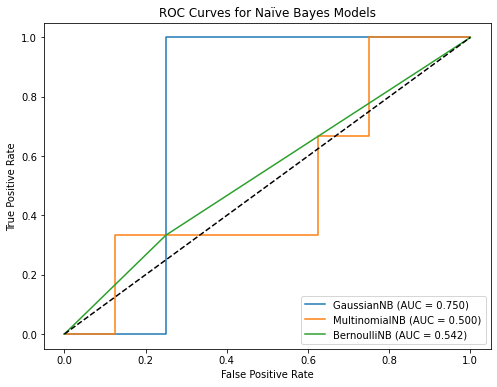

In [113]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Probability predictions for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = y_pred
    
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc,
        'model': model
    }
    
    print(f"{name} performance:")
    print(f" Precision: {precision:.3f}")
    print(f" Recall: {recall:.3f}")
    print(f" F1-score: {f1:.3f}")
    print(f" AUC-ROC: {auc:.3f}\n")

# ROC Curve plot
plt.figure(figsize=(8,6))
for name, res in results.items():
    y_prob = res['model'].predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['auc_roc']:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naïve Bayes Models')
plt.legend()
plt.show()
